## **Smoking Drinking Prediction**

**Problem Statement:**  
The goal is to predict smoking and drinking habits based on various health and demographic attributes provided in the dataset. This involves analyzing the relationships between features such as age, gender, physical measurements, and health indicators to determine patterns and build a predictive model for smoking and drinking behavior.

Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same. It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes.

**Smoking Drinking Dataset -->**

#### **Importing Dependencies**

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

## **Data Collection & Data Analysis**

In [303]:
dataset = pd.read_csv('smoking_drinking_dataset.csv')

In [304]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [305]:
dataset.shape

(49999, 24)

In [306]:
dataset = dataset.sample(10000)

In [307]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

#### **Rename Columns for Clarity**

In [308]:
dataset.rename(columns={
    'sex': 'gender',
    'waistline': 'waist_cm',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'sight_left': 'vision_left',
    'sight_right': 'vision_right',
    'SBP': 'systolic_bp',
    'DBP': 'diastolic_bp',
    'BLDS': 'blood_sugar',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'hdl_cholesterol',
    'LDL_chole': 'ldl_cholesterol',
    'triglyceride': 'triglycerides',
    'Urine_protein': 'urine_protein',
    'serum_creatinine': 'creatinine',
    'AST': 'liver_ast',
    'ALT': 'liver_alt',
    'gamma_GTP': 'gamma_gtp',
    'SMK_stat_type_cd': 'smoking_status',
    'DRK_YN': 'is_drinker'
}, inplace=True)

In [309]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
13435,Male,30,175,70,85.0,0.7,1.0,1,1,119,81,95,223,63,140,99,16.1,1,0.8,29,33,22,3,N
22578,Male,45,170,75,87.0,0.7,0.5,1,1,123,89,166,264,58,166,199,16.6,1,0.9,27,18,135,3,Y
32185,Male,55,175,70,86.0,1.2,1.0,1,1,100,60,110,132,45,45,208,15.8,1,1.0,18,12,29,3,Y


#### **Checking Null Values**

In [310]:
print("\nMissing values:\n", dataset.isnull().sum())


Missing values:
 gender               0
age                  0
height_cm            0
weight_kg            0
waist_cm             0
vision_left          0
vision_right         0
hear_left            0
hear_right           0
systolic_bp          0
diastolic_bp         0
blood_sugar          0
total_cholesterol    0
hdl_cholesterol      0
ldl_cholesterol      0
triglycerides        0
hemoglobin           0
urine_protein        0
creatinine           0
SGOT_AST             0
SGOT_ALT             0
gamma_gtp            0
smoking_status       0
is_drinker           0
dtype: int64


#### **Checking Duplicated Values**

In [311]:
dataset[dataset.duplicated()]

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker


### **Visualizing the Data**

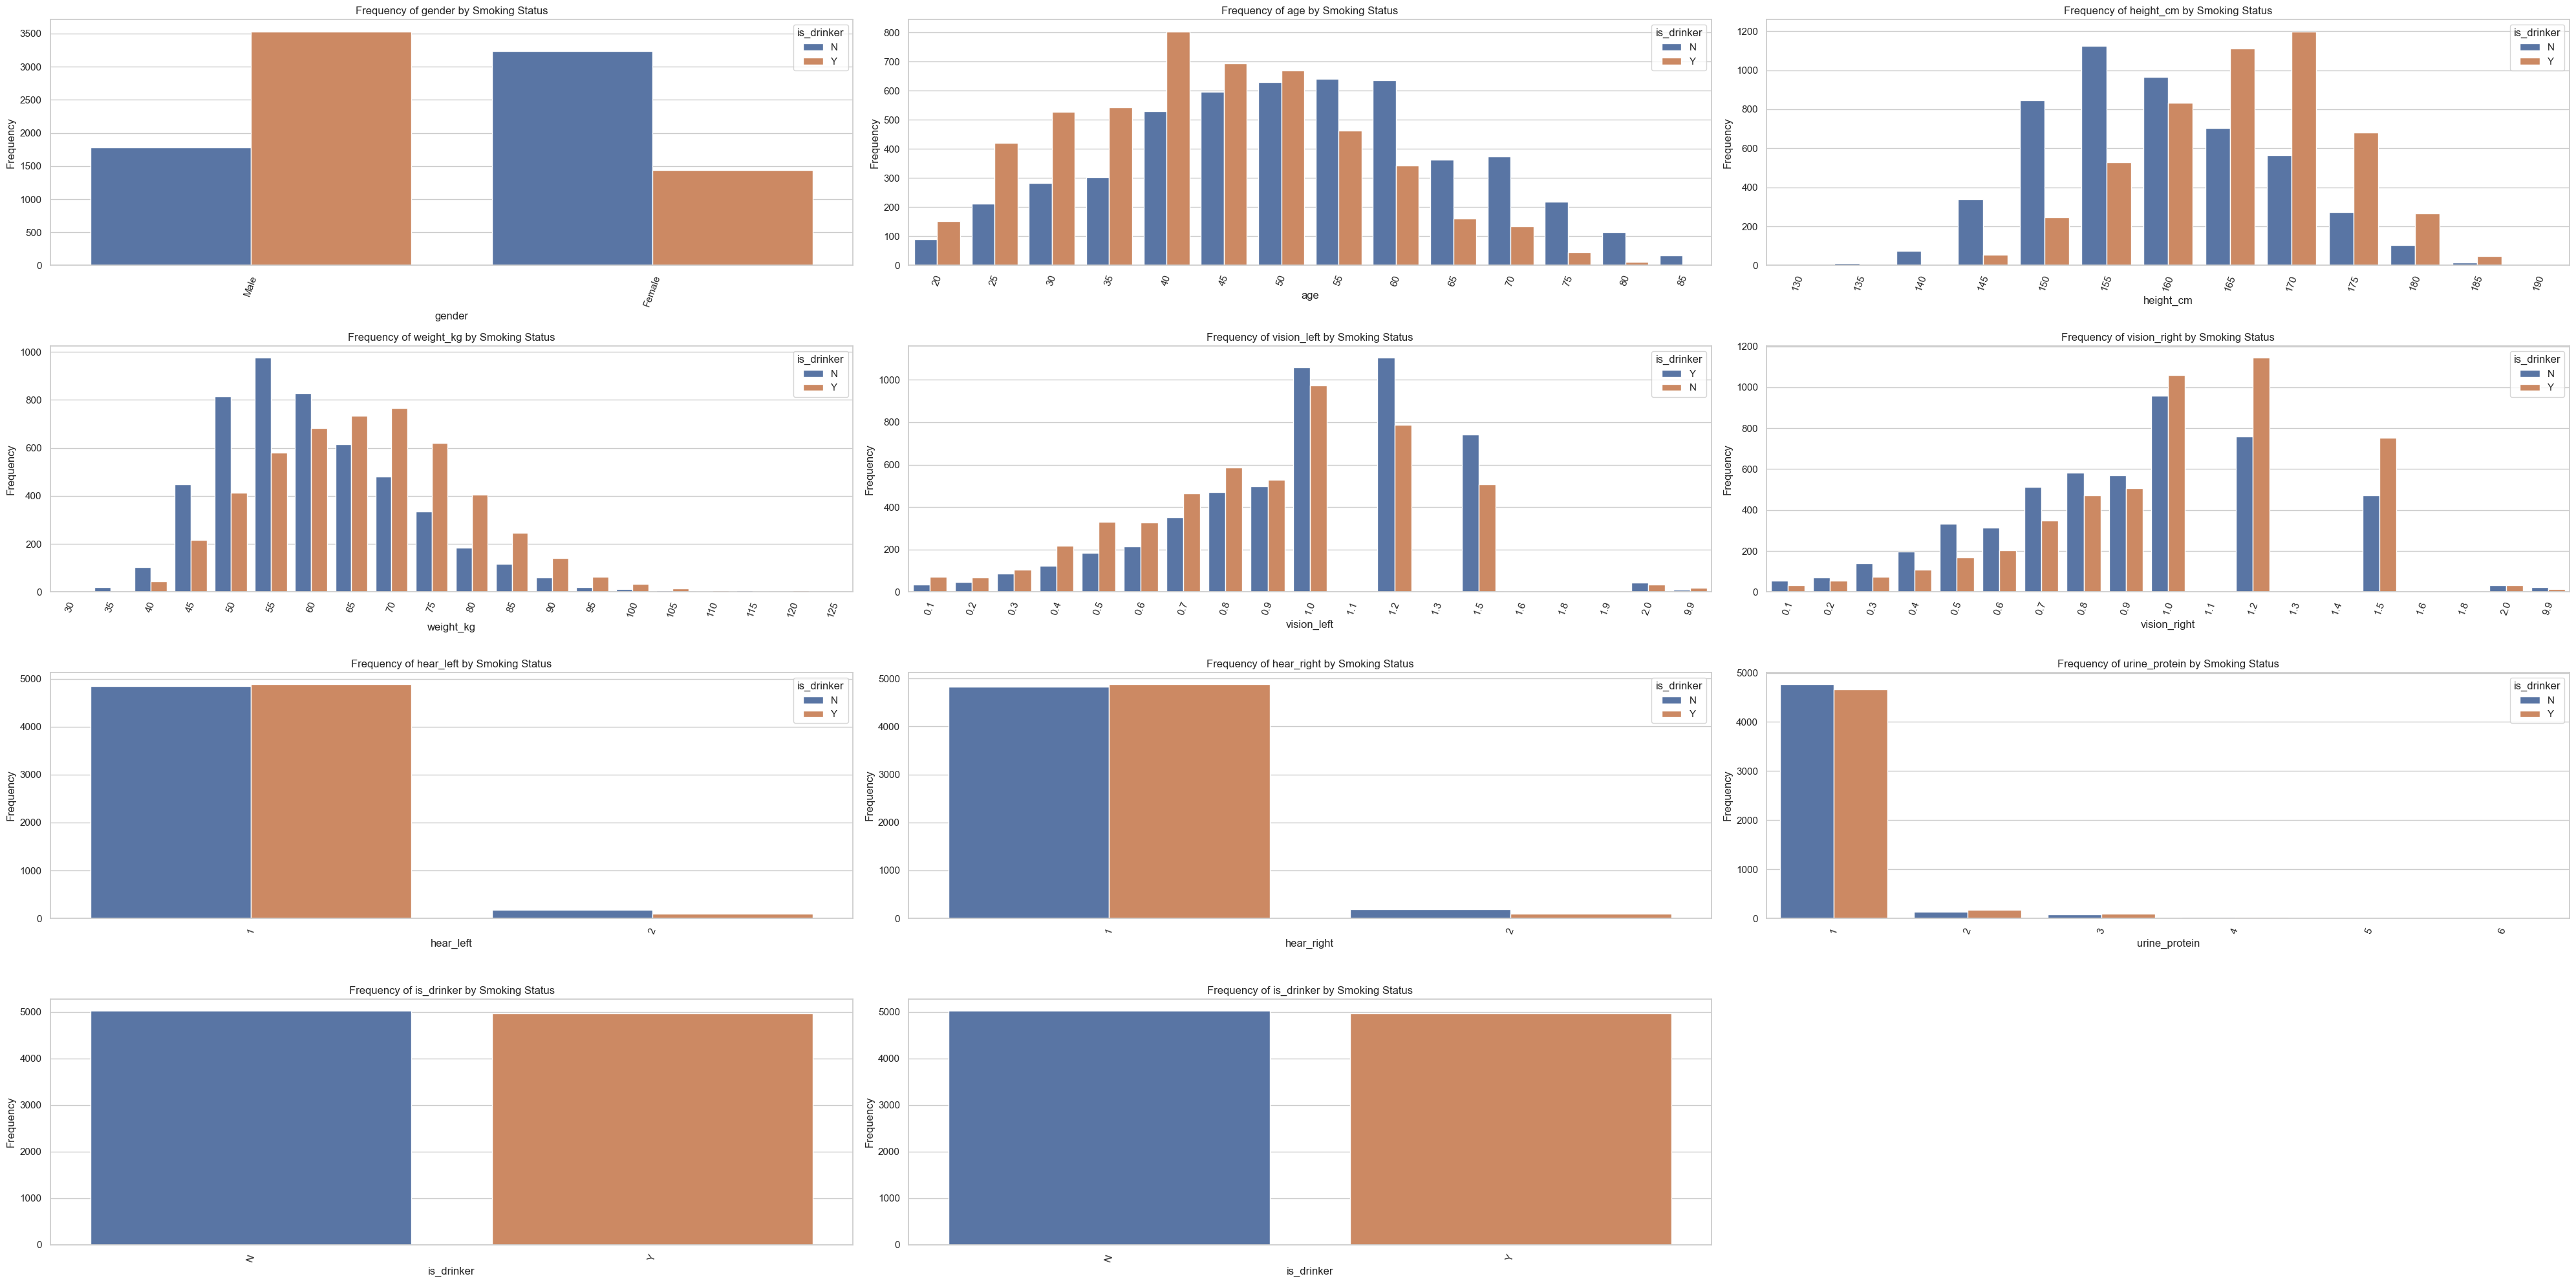

In [312]:
# current_y_is_smoking_or_drinking = 'smoking_status'
currently_is_smoking_or_drinking = 'is_drinker'

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

for idx, column in enumerate(['gender', 'age', 'height_cm', 'weight_kg', 'vision_left', 'vision_right', 'hear_left', 'hear_right',
                              "urine_protein", currently_is_smoking_or_drinking, "is_drinker"], start=1):

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=dataset , hue=currently_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

#### **Removing Ineffective Columns**

In [313]:
dataset.groupby('smoking_status').mean(numeric_only=True)

,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp
smoking_status,,,,,,,,,,,,,,,,,,,,,
1,48.136461,158.608954,59.393689,78.929754,0.952090,0.949265,1.029407,1.032215,121.152652,75.043119,98.717000,195.677515,59.275731,113.483892,115.370560,13.634660,1.085577,0.805667,24.650091,22.944160,28.114158
2,49.556636,167.491419,69.576659,85.344851,1.016991,1.039588,1.030892,1.028604,125.580664,78.522883,104.045767,194.576659,53.213387,112.514302,150.528604,14.939645,1.102403,0.964645,28.072082,30.358696,45.143021
3,43.356071,168.419736,69.556617,84.373943,1.018827,1.041746,1.017281,1.018645,123.412915,77.564347,103.257390,196.572078,52.577990,112.085493,169.399272,15.246203,1.113233,0.938427,27.259663,29.913142,54.916780


In [314]:
dataset.drop(['hear_left', 'hear_right', 'urine_protein'], axis=1, inplace=True)

In [315]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
13435,Male,30,175,70,85.0,0.7,1.0,119,81,95,223,63,140,99,16.1,0.8,29,33,22,3,N
22578,Male,45,170,75,87.0,0.7,0.5,123,89,166,264,58,166,199,16.6,0.9,27,18,135,3,Y
32185,Male,55,175,70,86.0,1.2,1.0,100,60,110,132,45,45,208,15.8,1.0,18,12,29,3,Y
41961,Female,30,155,45,63.0,0.6,0.5,95,61,84,206,87,105,67,13.8,0.7,23,19,26,1,N
14711,Male,40,165,70,91.0,0.8,0.6,132,82,129,257,50,154,264,17.9,1.2,38,64,129,3,Y


#### **Labelled Encoding**

In [316]:
label = LabelEncoder()

In [317]:
dataset['gender'] = label.fit_transform(dataset.gender) # Male - 1, Female - 2

In [318]:
dataset['is_drinker'] = label.fit_transform(dataset.is_drinker) # Yes - 1, No - 0

In [319]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
13435,1,30,175,70,85.0,0.7,1.0,119,81,95,223,63,140,99,16.1,0.8,29,33,22,3,0
22578,1,45,170,75,87.0,0.7,0.5,123,89,166,264,58,166,199,16.6,0.9,27,18,135,3,1
32185,1,55,175,70,86.0,1.2,1.0,100,60,110,132,45,45,208,15.8,1.0,18,12,29,3,1
41961,0,30,155,45,63.0,0.6,0.5,95,61,84,206,87,105,67,13.8,0.7,23,19,26,1,0
14711,1,40,165,70,91.0,0.8,0.6,132,82,129,257,50,154,264,17.9,1.2,38,64,129,3,1


### **Outlier Treatment**

#### Waistline & Gamma GPT

In [320]:
print('waistline: ')
print(dataset['waist_cm'].describe())
print('gamma_GPT: ')
print(dataset['gamma_gtp'].describe())

waistline: 
count    10000.000000
mean        81.248290
std          9.664621
min         52.000000
25%         74.000000
50%         81.000000
75%         87.500000
max        128.000000
Name: waist_cm, dtype: float64
gamma_GPT: 
count    10000.000000
mean        36.984700
std         48.475852
min          3.000000
25%         16.000000
50%         23.000000
75%         39.000000
max        999.000000
Name: gamma_gtp, dtype: float64


In [321]:
# Drop unrealistic values
dataset = dataset[dataset['waist_cm'] < 200]
dataset = dataset[dataset['gamma_gtp'] < 200]

In [322]:
print('waistline: ')
print(dataset['waist_cm'].describe())
print('gamma_GPT: ')
print(dataset['gamma_gtp'].describe())

waistline: 
count    9866.000000
mean       81.174640
std         9.666375
min        52.000000
25%        74.000000
50%        81.000000
75%        87.000000
max       128.000000
Name: waist_cm, dtype: float64
gamma_GPT: 
count    9866.000000
mean       33.027772
std        29.117077
min         3.000000
25%        16.000000
50%        23.000000
75%        38.000000
max       199.000000
Name: gamma_gtp, dtype: float64


In [323]:
numerical_columns = ['gender', 'age', 'height_cm', 'weight_kg', 'waist_cm', 'vision_left', 'vision_right',
                 'systolic_bp', 'diastolic_bp', 'blood_sugar', 'total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol',
                 'triglycerides', 'hemoglobin', 'creatinine', 'SGOT_AST',
                 'SGOT_ALT', 'gamma_gtp']

In [324]:
original_data = dataset.copy() 

In [325]:
# Apply IQR-based clipping to numerical columns
for col in numerical_columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    dataset[col] = dataset[col].clip(lower=lower, upper=upper)

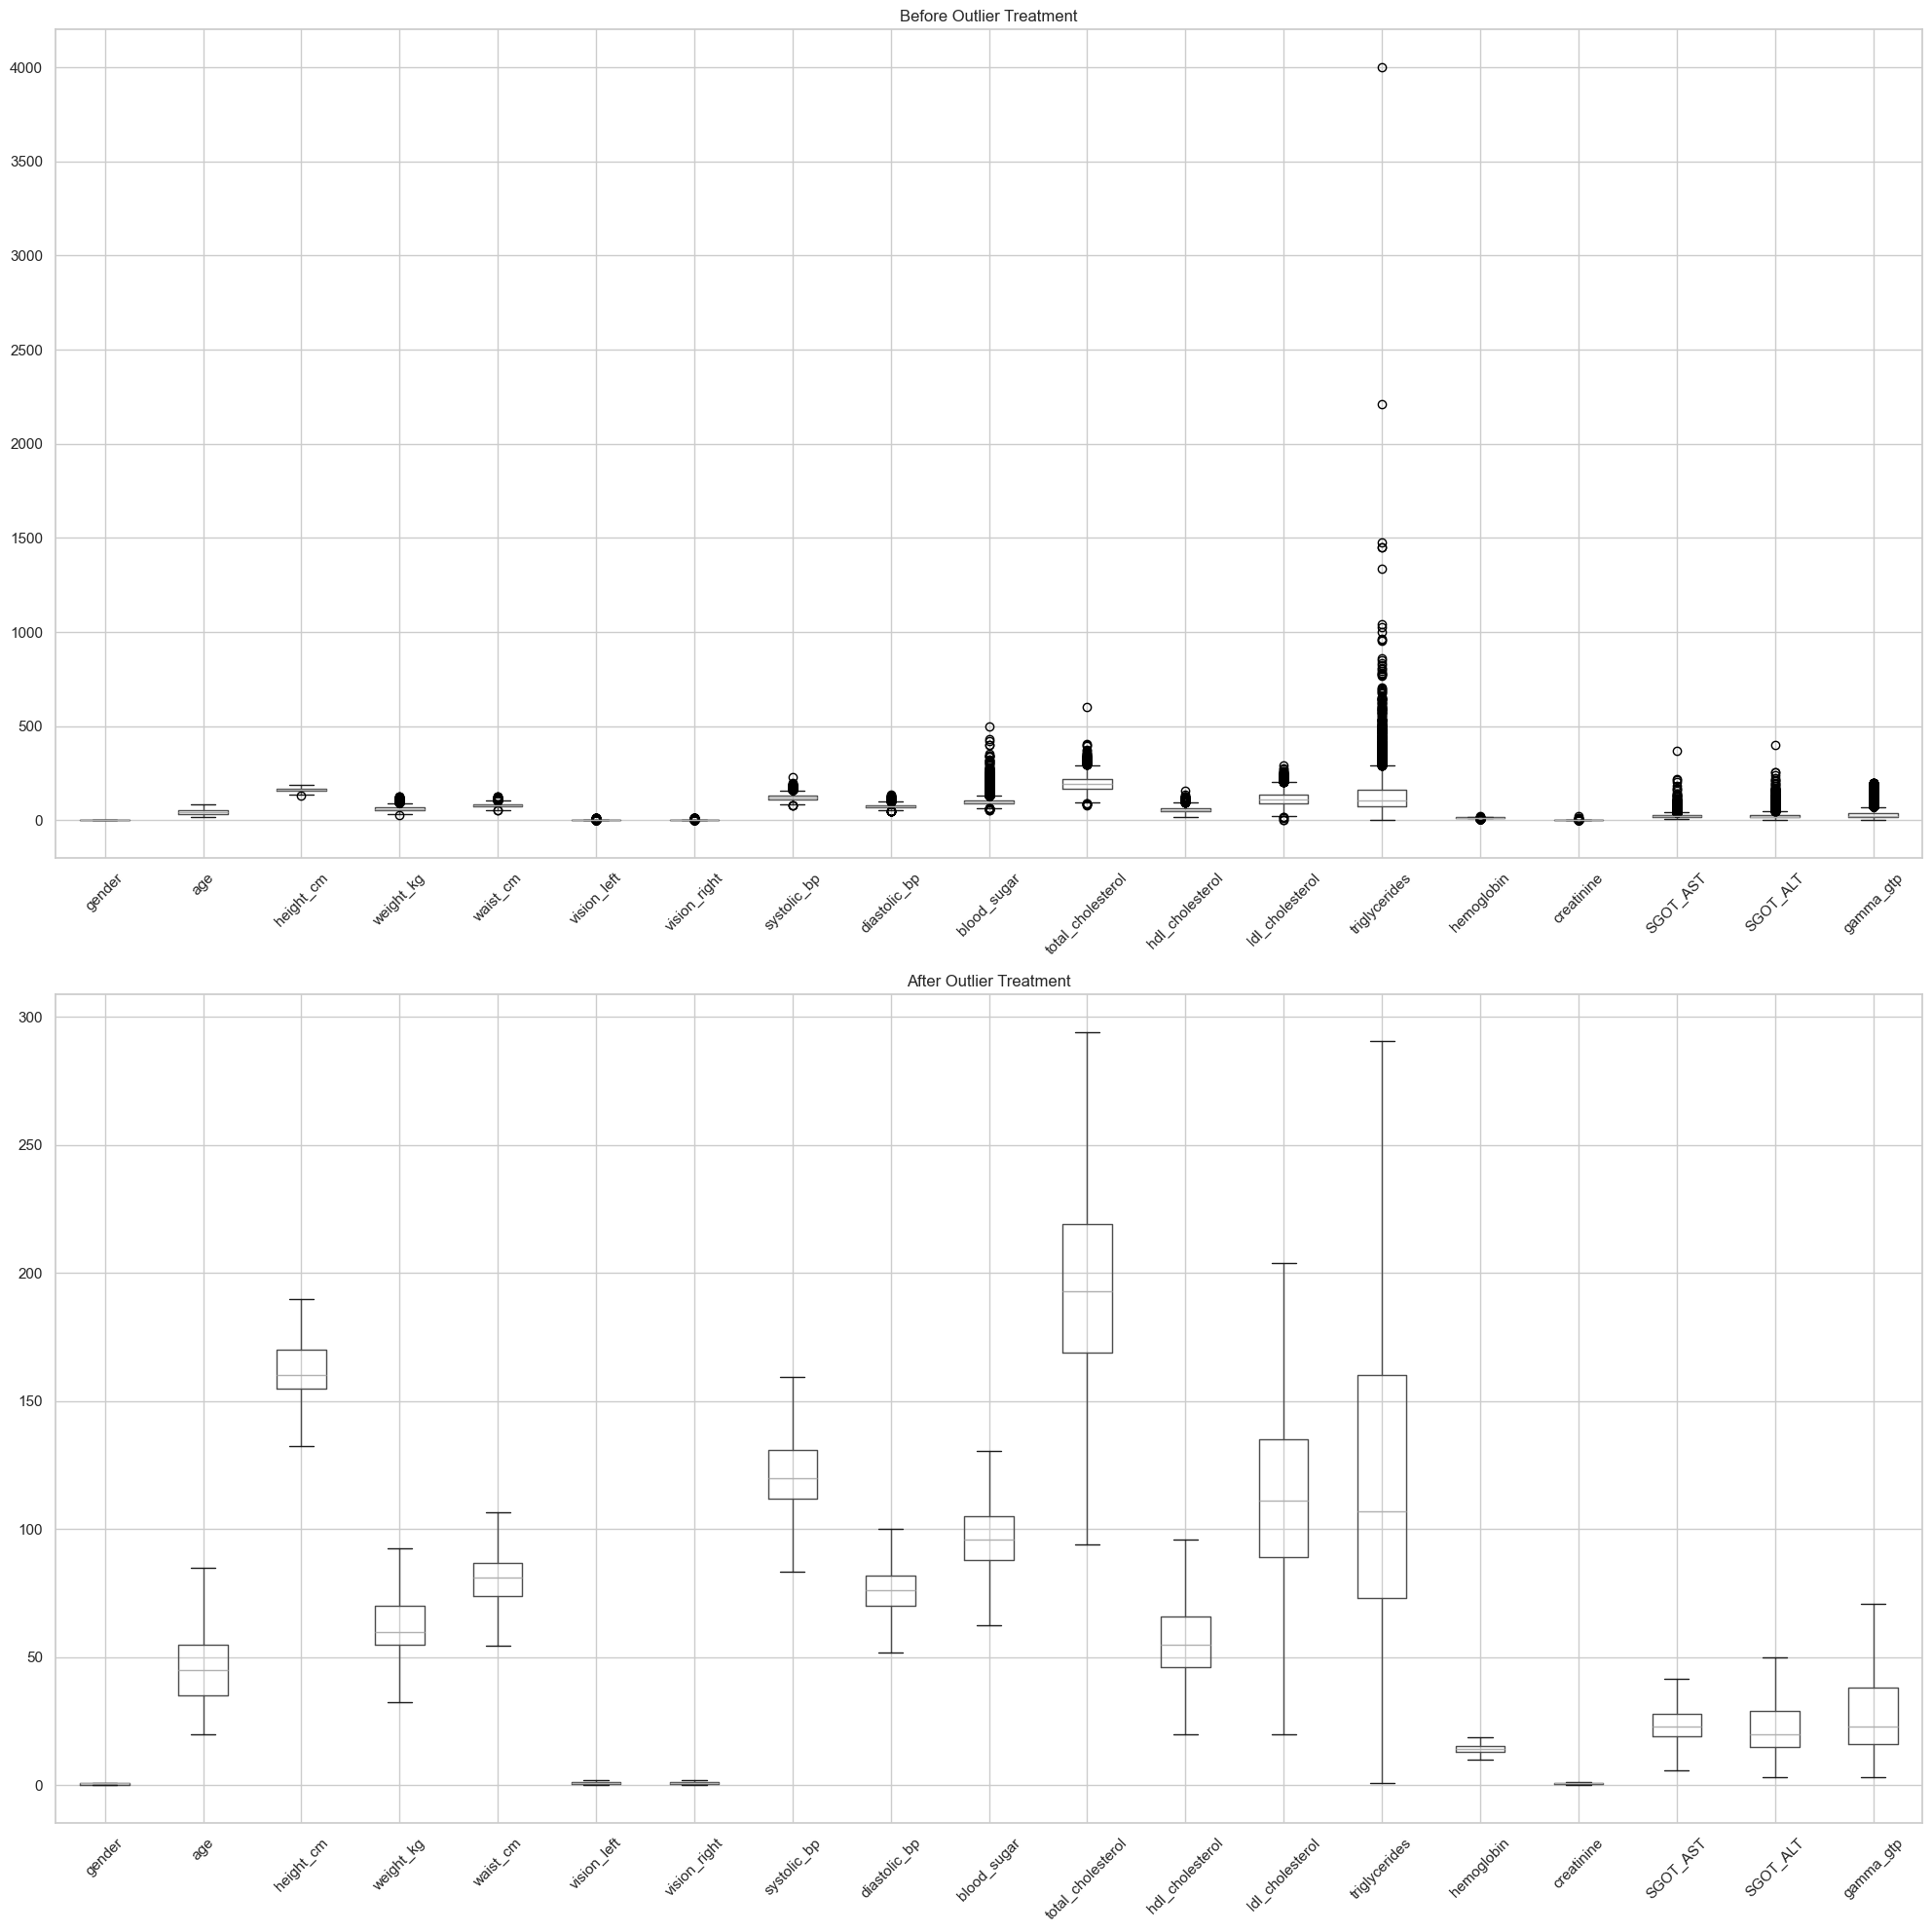

In [326]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot before
original_data[numerical_columns].boxplot(ax=axes[0])
axes[0].set_title("Before Outlier Treatment")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after
dataset[numerical_columns].boxplot(ax=axes[1])
axes[1].set_title("After Outlier Treatment")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [327]:
print("After outlier treatment:")
print(dataset[numerical_columns].describe())

After outlier treatment:
            gender          age    height_cm    weight_kg     waist_cm  \
count  9866.000000  9866.000000  9866.000000  9866.000000  9866.000000   
mean      0.527063    47.335800   162.264089    63.180874    81.130833   
std       0.499292    14.139793     9.246893    12.142485     9.527610   
min       0.000000    20.000000   132.500000    32.500000    54.500000   
25%       0.000000    35.000000   155.000000    55.000000    74.000000   
50%       1.000000    45.000000   160.000000    60.000000    81.000000   
75%       1.000000    55.000000   170.000000    70.000000    87.000000   
max       1.000000    85.000000   190.000000    92.500000   106.500000   

       vision_left  vision_right  systolic_bp  diastolic_bp  blood_sugar  \
count  9866.000000   9866.000000  9866.000000     9866.0000  9866.000000   
mean      0.955595      0.954784   122.206264       76.0448    97.940148   
std       0.344801      0.340925    13.958884        9.5690    14.157411   
min 

### **Train-Test Spilit**

In [328]:
X = dataset.drop('is_drinker', axis=1)
Y = dataset['is_drinker']

In [329]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [330]:
print(X.shape, X_train.shape, X_test.shape)

(9866, 20) (7892, 20) (1974, 20)


In [331]:
print(Y.shape, Y_train.shape, Y_test.shape)

(9866,) (7892,) (1974,)


### **Data Standardization**

In [332]:
numerical_columns = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'vision_left',
       'vision_right', 'systolic_bp', 'diastolic_bp', 'blood_sugar',
       'total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'hemoglobin', 'creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_gtp']

In [333]:
scalor = StandardScaler()

In [334]:
X_train[numerical_columns] = scalor.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scalor.fit_transform(X_test[numerical_columns])

### **Logestic Regression**

In [335]:
lr_model = LogisticRegression()

In [336]:
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [337]:
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [338]:
X_test_prediction = lr_model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [339]:
print('Accuracy on Training Data: ', training_data_accuracy * 100)
print('Accuracy on Testing Data: ', testing_data_accuracy * 100)

Accuracy on Training Data:  72.80790674100355
Accuracy on Testing Data:  71.22593718338399


In [340]:
rf = RandomForestClassifier(max_depth=15, random_state=42)

In [341]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [342]:
X_train_predict = rf.predict(X_train)

In [343]:
X_test_predict = rf.predict(X_test)

In [344]:
print('Accuracy on Training Data: ', accuracy_score(Y_train, X_train_predict) * 100)
print('Accuracy on Testing Data: ', accuracy_score(Y_test, X_test_predict) * 100)

Accuracy on Training Data:  99.06234161175874
Accuracy on Testing Data:  69.95947315096251


In [345]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
13435,1,30,175.0,70.0,85.0,0.7,1.0,119.0,81,95.0,223,63,140,99.0,16.1,0.8,29.0,33,22,3,0
22578,1,45,170.0,75.0,87.0,0.7,0.5,123.0,89,130.5,264,58,166,199.0,16.6,0.9,27.0,18,71,3,1
32185,1,55,175.0,70.0,86.0,1.2,1.0,100.0,60,110.0,132,45,45,208.0,15.8,1.0,18.0,12,29,3,1
41961,0,30,155.0,45.0,63.0,0.6,0.5,95.0,61,84.0,206,87,105,67.0,13.8,0.7,23.0,19,26,1,0
14711,1,40,165.0,70.0,91.0,0.8,0.6,132.0,82,129.0,257,50,154,264.0,17.9,1.2,38.0,50,71,3,1


In [346]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [349]:
Y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy * 100)

Test Accuracy: 71.52988855116514
